In [280]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [281]:
N_GRAPH = 1000

In [282]:
def get_xs(xl, xr, n):
    if n == 1:
        return np.array([xl])
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [283]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [284]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

In [285]:
def gilbert(n):
    return np.array([[1 / (i + j + 1) for j in range(n)] for i in range(n)])

In [286]:
gilbert(5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

In [287]:
def max_eig_linalg(A):
    return max(np.linalg.eig(A)[0])

In [288]:
def max_eig(A, p=100):
    b = np.ones(A.shape[0])
    for i in range(p):
        b = A @ b
        b /= np.linalg.norm(b)
    return np.inner(A @ b, b) / np.inner(b, b)

In [289]:
A = gilbert(2)
print(max_eig_linalg(A))
print(max_eig(A))

1.2675918792439982
1.2675918792439982


In [290]:
def min_eig_linalg(A):
    return min(np.linalg.eig(A)[0])

In [291]:
def min_eig(A, p=100, norm=False):
    t = max_eig(A, p=p)
    return max_eig(A - t * np.identity(A.shape[0]), p=p) + t

In [292]:
A = gilbert(2)
print(min_eig_linalg(A))
print(min_eig(A))

0.06574145408933513
0.06574145408933485


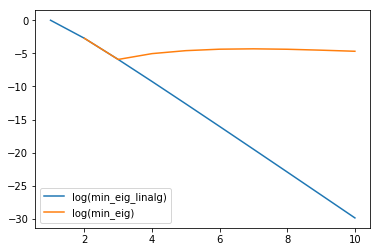

In [293]:
n_from = 1
n_to = 10

ns = list(range(n_from, n_to + 1))

ys_linalg = list(map(lambda n: min_eig_linalg(gilbert(n)), ns))
ys = list(map(lambda n: min_eig(gilbert(n)), ns))

ns = [ns] * 2
ys = [ys_linalg, ys]
names = ["log(min_eig_linalg)", "log(min_eig)"]

ys = np.array(ys)
ys = np.log(ys)

draw(ns, ys, names)

In [294]:
def kappa_linalg(A):
    return np.linalg.cond(A)

In [295]:
def kappa(A):
    return max_eig(A) / min_eig(A)

In [296]:
A = gilbert(2)
print(kappa_linalg(A))
print(kappa(A))

19.28147006790397
19.28147006790405


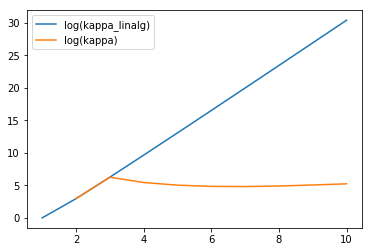

In [297]:
n_from = 1
n_to = 10

ns = list(range(n_from, n_to + 1))

ys_linalg = list(map(lambda n: kappa_linalg(gilbert(n)), ns))
ys = list(map(lambda n: kappa(gilbert(n)), ns))

ns = [ns] * 2
ys = [ys_linalg, ys]
names = ["log(kappa_linalg)", "log(kappa)"]

ys = np.array(ys)
ys = np.log(ys)

draw(ns, ys, names)